In [503]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [504]:
url = 'http://www.stat.ufl.edu/~winner/data/airq402.dat'
air = pd.read_csv(url,sep = '\s+',names=['city1','city2','Average Fare','Distance','Average weekly passengers','market leading airline','market share1','average fare','low price airline','market share2','price'])


In [505]:
air.head(2)

,city1,city2,Average Fare,Distance,Average weekly passengers,market leading airline,market share1,average fare,low price airline,market share2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94


In [506]:
air.shape

(1000, 11)

In [507]:
air.describe()

,Average Fare,Distance,Average weekly passengers,market share1,average fare,market share2,price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


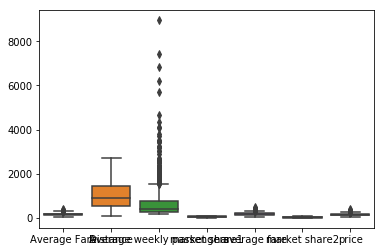

In [508]:
sns.boxplot(data=air)

In [509]:
air.quantile(q=0.25)

Average Fare                 125.9750
Distance                     553.5000
Average weekly passengers    257.1975
market share1                 46.5100
average fare                 124.0850
market share2                 13.1950
price                        113.7675
Name: 0.25, dtype: float64

In [510]:
air.quantile(q=0.75)

Average Fare                  197.3925
Distance                     1452.5000
Average weekly passengers     769.9125
market share1                  73.5100
average fare                  202.9775
market share2                  52.9725
price                         168.5300
Name: 0.75, dtype: float64

In [511]:
airnum = air.select_dtypes(np.number)

In [512]:
airnum.head(5)

,Average Fare,Distance,Average weekly passengers,market share1,average fare,market share2,price
0,114.47,528,424.56,70.19,111.03,70.19,111.03
1,122.47,860,276.84,75.10,123.09,17.23,118.94
2,214.42,852,215.76,78.89,223.98,2.77,167.12
3,69.40,288,606.84,96.97,68.86,96.97,68.86
4,158.13,723,313.04,39.79,161.36,15.34,145.42


In [513]:
Q1 = air.quantile(0.25)
Q3 = air.quantile(0.75)
IQR = Q3 - Q1
meanair = air.mean()

In [514]:
low = Q1 - 1.5*IQR
high = Q3 + 1.5*IQR

In [515]:
airnum.head(2)

,Average Fare,Distance,Average weekly passengers,market share1,average fare,market share2,price
0,114.47,528,424.56,70.19,111.03,70.19,111.03
1,122.47,860,276.84,75.10,123.09,17.23,118.94


In [516]:
airx = airnum[~((airnum<low)|(airnum>high)).any(axis=1)]

In [517]:
airx.shape

(885, 7)

In [518]:
airy = airx.copy()

In [519]:
airnum.shape

(1000, 7)

In [520]:
## splitting columns of independent and dependant variables

In [521]:
##Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable and split the table

In [522]:
y_var = airx['Average Fare']
x_var = airx.drop(['Average Fare'],axis=1)

In [523]:
x_var.shape

(885, 6)

In [524]:
airx.columns

Index(['Average Fare', 'Distance', 'Average weekly passengers',
       'market share1', 'average fare', 'market share2', 'price'],
      dtype='object')

In [525]:
##Drop the independent variables which has less than 0.1 correlation with the dependent variable

In [526]:
x_var.corrwith(y_var)

Distance                     0.522650
Average weekly passengers   -0.197005
market share1               -0.207955
average fare                 0.979713
market share2               -0.493555
price                        0.840993
dtype: float64

In [527]:
airx.drop(['Average weekly passengers','market share1','market share2'],axis=1,inplace=True)

C:\Users\isaur\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [528]:
airx.head()

,Average Fare,Distance,average fare,price
0,114.47,528,111.03,111.03
1,122.47,860,123.09,118.94
2,214.42,852,223.98,167.12
3,69.40,288,68.86,68.86
4,158.13,723,161.36,145.42


In [529]:
airx.shape

(885, 4)

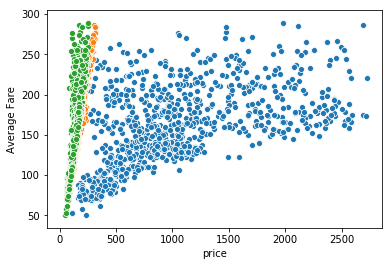

In [530]:
sns.scatterplot(x= "Distance", y="Average Fare",data=airx)
sns.scatterplot(x="average fare",y="Average Fare",data=airx)
sns.scatterplot(x="price",y="Average Fare",data=airx)

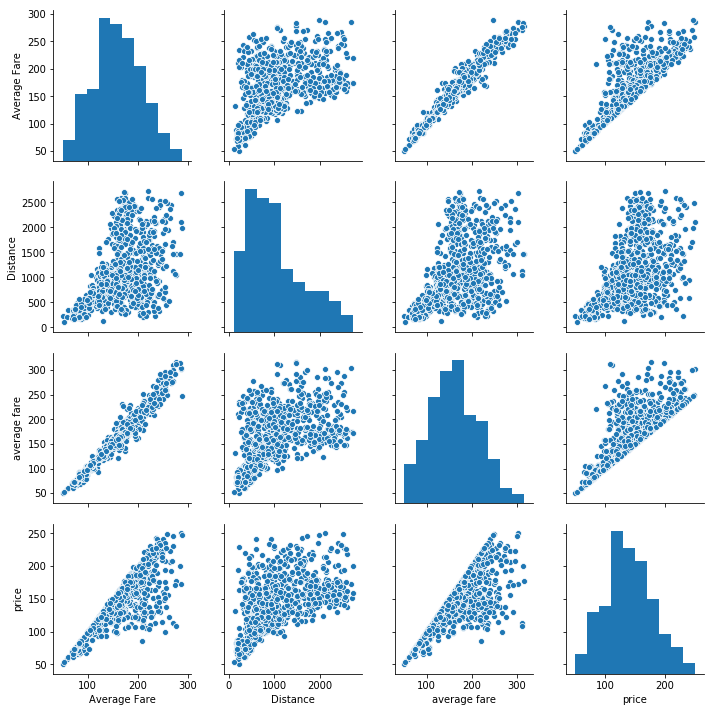

In [531]:
sns.pairplot(airx)

In [532]:
cc = pd.concat([airx,air[['city1','city2','market leading airline','low price airline']]],axis=1,ignore_index=False)

In [533]:
air_final = cc.dropna(how='any',axis=0)

In [534]:
air_final.shape

(885, 8)

In [535]:
airx.columns

Index(['Average Fare', 'Distance', 'average fare', 'price'], dtype='object')

In [536]:
#air_data = pd.get_dummies(air_final,drop_first=True)

In [537]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [538]:
#yy = air_data['Average Fare']
yy = airx['Average Fare']

In [540]:
#xx = air_data.drop(['Average Fare'],axis=1)
xx = airx.drop(['Average Fare'],axis=1)

In [541]:
x_train,x_test,y_train,y_test=train_test_split(xx,yy,test_size=0.2)

In [542]:
from sklearn.linear_model import LinearRegression

In [543]:
lr = LinearRegression()

In [557]:
x_train.shape

(708, 3)

In [558]:
y_train.head(5)

967    142.71
598    163.21
723    128.46
271    192.69
535    132.92
Name: Average Fare, dtype: float64

In [559]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [560]:
predict = lr.predict(x_test)

In [561]:
x_test.shape

(177, 3)

In [562]:
predict.shape

(177,)

In [563]:
result = pd.DataFrame()
result['observed'] = predict

In [564]:
result.shape

(177, 1)

In [565]:
result['expected'] = y_test

In [566]:
result.shape

(177, 2)

In [568]:
lr.coef_

array([0.00193595, 0.75441809, 0.20847061])

In [570]:
lr.intercept_

6.322278662325687

In [571]:
from sklearn import metrics

In [572]:
metrics.mean_squared_error(y_test,predict)

65.51673221995958

In [573]:
metrics.mean_absolute_error(y_test,predict)

5.8101899211252395

In [574]:
np.sqrt(metrics.mean_squared_error(y_test, predict))

8.094240682112163

In [575]:
metrics.r2_score(y_test,predict)

0.9749310919525156